# 1. Collect Dataset

# Use WebCam

In [ ]:
# libraries
import cv2
import os
import time
import random
import shutil

# setup my camera [my camera has the index (0)]
my_camera = cv2.VideoCapture(0)

# In case of Goodbye, Hello, Sorry, Thankyou

In [ ]:
# define a counter to give each frame a unique name 
counter = 0

# In this loop, Frames will be taken from the camera until we stop it.
while my_camera.isOpened():
    
    # read frame by frame from the camera -> return [frame, status of the reading process (is the camera capture the frame right or not)]
    # status -> Boolean, Frame --> image with np.array data type
    status, frame = my_camera.read()
    
    # display the captured frame
    cv2.imshow('Captured Frame', frame)
    
    # save the captured frame on pressing [s]
    if cv2.waitKey(1) & 0xFF == ord('s'):
        # increase counter by 1 
        counter += 1 
        cv2.imwrite(os.path.join('data', 'goodbye',f'{counter}_no_image.jpg'), frame)
        print(f'{counter}_image successfully saved')
    
    # Stop the reading process on pressing [q]
    elif cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
my_camera.release()
cv2.destroyAllWindows()

# In case of Help

In [ ]:
# define a counter to give each frame a unique name 
counter = 0

# In this loop, Frames will be taken from the camera until we stop it.
while my_camera.isOpened():
    
    # read frame by frame from the camera -> return [frame, status of the reading process (is the camera capture the frame right or not)]
    # status -> Boolean, Frame --> image with np.array data type
    status, frame = my_camera.read()
    
    # display the captured frame
    cv2.imshow('Captured Frame', frame)
    
    # increase counter by 1 
    counter += 1 
    cv2.imwrite(os.path.join('data', 'help',f'{counter}_no_image.jpg'), frame)
    print(f'{counter}_image successfully saved')
    time.sleep(0.5)
    
    # Stop the reading process on pressing [q]
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
my_camera.release()
cv2.destroyAllWindows()

# Give unique name for each image among all classes

In [ ]:
# make list of all classes
classes = ['goodbye', 'hello', 'help', 'sorry', 'thankyou']

for class_folder in classes:
    
    # list of all images in each class folder
    all_class_folder_images = os.listdir(os.path.join('data', class_folder))
    
    # add the name of the class to each file name 
    for image in all_class_folder_images:
        source = os.path.join('data', class_folder, image)
        destination = os.path.join('data', class_folder, f'{class_folder}_{image}')
        os.rename(source, destination)

# Dataset size at this step

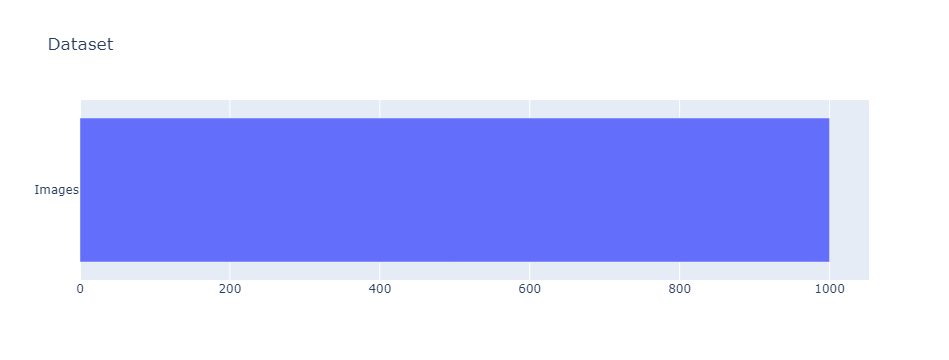

In [32]:
import plotly.graph_objects as go

# Define data
labels = ['Images']
values = [1000]

# Create horizontal bar chart
fig = go.Figure(data=[go.Bar(y=labels, x=values, orientation='h')])

# Update layout
fig.update_layout(title_text='Dataset')

# Show the chart
fig.show()

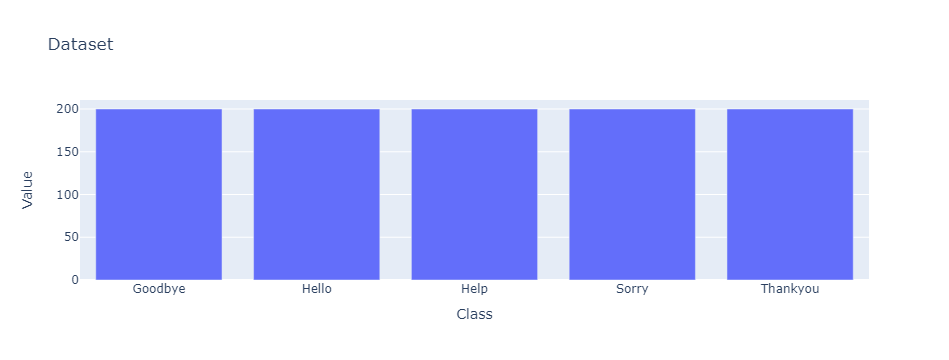

In [31]:
import plotly.express as px

# Create a DataFrame with the data
data = {'Class': ['Goodbye', 'Hello', 'Help', 'Sorry', 'Thankyou'],
        'Value': [200, 200, 200, 200, 200]}

# Create the bar plot using Plotly Express
fig = px.bar(data, x='Class', y='Value', title='Dataset')

# Show the plot
fig.show()

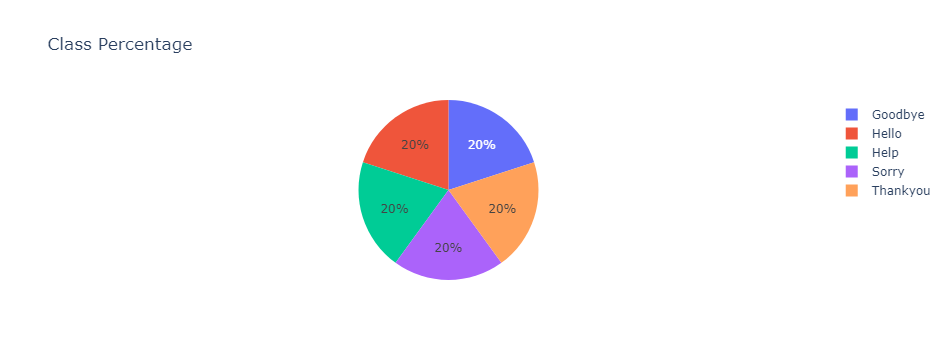

In [16]:
import plotly.graph_objects as go

# Define data
labels = ['Goodbye', 'Hello', 'Help', 'Sorry', 'Thankyou']
values = [20, 20, 20, 20, 20]  # percentages

# Create pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])

# Update layout
fig.update_layout(title_text='Class Percentage')

# Show the chart
fig.show()


# Extract Frames from tutorial videos

In [ ]:
for i in os.listdir('Tutorial'):
    
    # define the classs name
    class_name = i.split('.')[0]
    
    # read the video 
    video_path = os.path.join('Tutorial',i)
    video = cv2.VideoCapture(video_path)
    
    counter = 0
    status = True  
    while status:
        status, frame = video.read()
        counter += 1 
        frame_path = os.path.join('tutorial images',f'{class_name}_{counter}__frame.jpg')
        if status:
            cv2.imwrite(frame_path, frame)
    video.release()

NOTE: After collecting the frames, We must filter the frames, then put them in the data folder manually

# Dataset size at this step

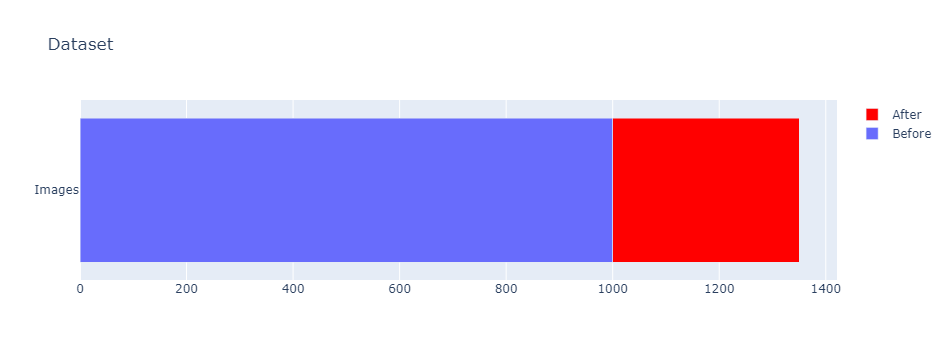

In [33]:
import plotly.graph_objects as go

# Define data
labels = ['Images']
values = [1000, 350]

# Define colors
colors = ['rgb(104,108,252)', 'rgb(255, 0, 0)']

# Create horizontal stacked bar chart
fig = go.Figure()

# Add the blue segment
fig.add_trace(go.Bar(y=labels, x=[1000], orientation='h', marker_color=colors[0], name='Before'))

# Add the red segment
fig.add_trace(go.Bar(y=labels, x=[350], orientation='h', marker_color=colors[1], name='After'))

# Update layout
fig.update_layout(title_text='Dataset', barmode='stack')

# Show the chart
fig.show()


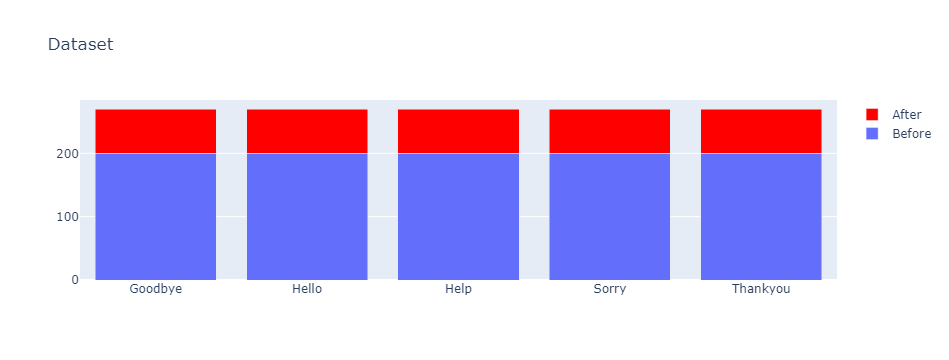

In [87]:
import plotly.graph_objects as go

# Sample data
categories = ['Goodbye', 'Hello', 'Help', 'Sorry', 'Thankyou']
before_values = [200, 200, 200, 200, 200]
after_values = [70, 70, 70, 70, 70]

# Create traces
trace_before = go.Bar(
    x=categories,
    y=before_values,
    name='Before',
)
trace_after = go.Bar(
    x=categories,
    y=after_values,
    name='After',
    marker_color='rgb(255, 0, 0)'
)

# Create layout
layout = go.Layout(
    title='Dataset',
    barmode='stack',
)

# Create figure
fig = go.Figure(data=[trace_before, trace_after], layout=layout)

# Show plot
fig.show()


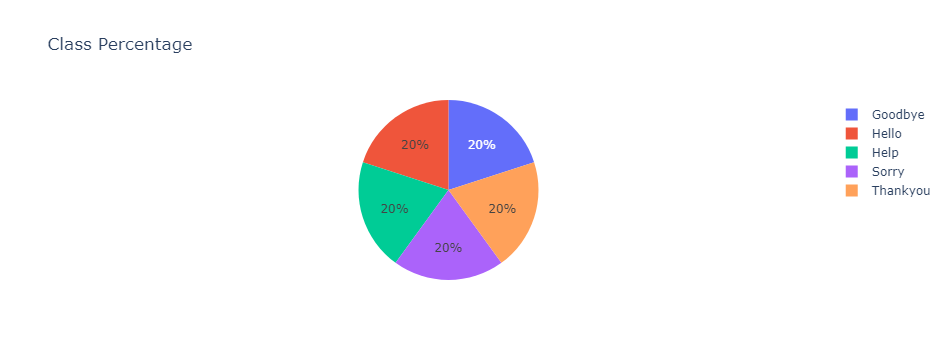

In [17]:
import plotly.graph_objects as go

# Define data
labels = ['Goodbye', 'Hello', 'Help', 'Sorry', 'Thankyou']
values = [20, 20, 20, 20, 20]  # percentages

# Create pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])

# Update layout
fig.update_layout(title_text='Class Percentage')

# Show the chart
fig.show()


# 2. Data Preparation

In [1]:
# libraries
import os
import pickle
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Feature Extraction
- In this step we will extract the features from the both hands of the images 
- So instead of make the model focus on the whole image, the model will just focus on the hands of each image
- we will get the landmarks from each hand which are points, each point has x,y values 
- these x,y values cosider as features that will be used in the training process

<img src='feature extraction process .png'>

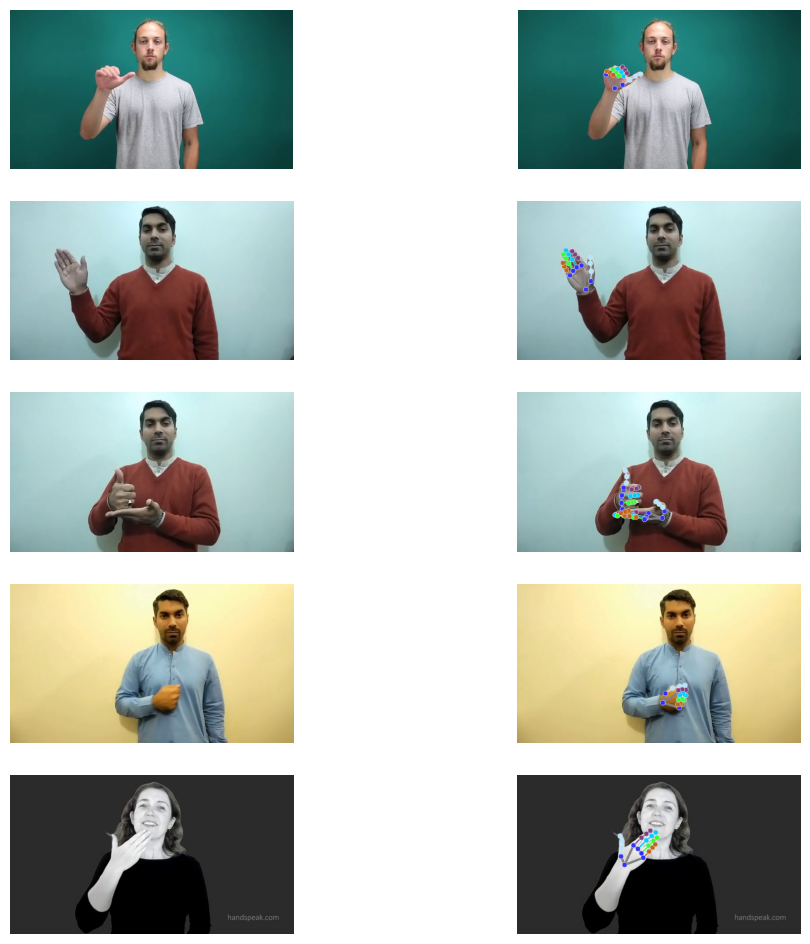

In [2]:
# 'goodbye_2_27__frame.jpg', 'hello_2_24__frame.jpg', 'help_3_36__frame.jpg', 'sorry_3_18__frame.jpg', 'thankyou_1_14__frame.jpg'
# image names
image_names = ['goodbye_2_27__frame.jpg', 'hello_2_24__frame.jpg', 'help_3_36__frame.jpg', 'sorry_3_18__frame.jpg', 'thankyou_4_28__frame.jpg']

# create the display figure 
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=[12,12])

# create object just focus on the hands 
mp_hands = mp.solutions.hands

# for display 
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

# get the model that detect hand_landmarks 
hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.5)


# loop on the images 
for i in range(len(image_names)):
    
    # get the image path
    image_path = os.path.join('data', f'{image_names[i].split("_")[0]}', f'{image_names[i]}')
    
    # read the image --> by default bgr mode
    image = cv2.imread(image_path)
    
    # convert image from bgr to rgb
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # get hands detection on the rgb image 
    result = hands.process(image_rgb)
    
    # display the rgb image 
    ax[i][0].imshow(image_rgb)
    ax[i][0].axis('off')
    
    # draw the detected landmarks on the rgb image 
    if result.multi_hand_landmarks:
        for hand_landmark in result.multi_hand_landmarks:
            mp_drawing.draw_landmarks(
                            image_rgb,
                            hand_landmark, 
                            mp_hands.HAND_CONNECTIONS,
                            mp_drawing_styles.get_default_hand_landmarks_style(),
                            mp_drawing_styles.get_default_hand_connections_style())

    # display the rgb image after draw the landmarks on it 
    ax[i][1].imshow(image_rgb)
    ax[i][1].axis('off')


# Make new dataset
- Instead of train the model on Images and Labels 
- We will train the model on Features and Labels

In [3]:
# create object just focus on the hands 
mp_hands = mp.solutions.hands

# get the model that detect hand_landmarks 
hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)

all_landmarks = []
labels = []
for class_name in os.listdir(os.path.join('data')):
    for image_name in os.listdir(os.path.join('data', class_name)):
        
        # define the path of the image
        image_path = os.path.join('data', class_name, image_name)

        # bgr image
        image = cv2.imread(image_path)

        # rgb image 
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # process the rgb image to get the hand detection
        result = hands.process(image_rgb)
        
        # define list to put in it x,y values for each landmarks 
        current_image_landmarks = []
        
        # get x and y value for each landmark
        
        # check if there is any detection of hands or not 
        if result.multi_hand_landmarks:

            for hand_landmark in result.multi_hand_landmarks:
                for landmark in hand_landmark.landmark:
                    current_image_landmarks.append(landmark.x)
                    current_image_landmarks.append(landmark.y)
            
            # check that the number of landmarks are equal for each image
            if len(current_image_landmarks) < 84:
                current_image_landmarks = current_image_landmarks + [0]*(84-len(current_image_landmarks))
            
            # append the value of current_image_data in the all_data list
            all_landmarks.append(current_image_landmarks)
            
            # append the label of this image to the labels list
            if class_name == 'goodbye':
                labels.append(0)
            
            elif class_name == 'hello':
                labels.append(1)
            
            elif class_name == 'help':
                labels.append(2)
            
            elif class_name == 'sorry':
                labels.append(3)
            
            else:
                labels.append(4)
        
        else:
            print(image_name)
            
# print the length of the all_data list
print(len(all_landmarks))

# print the labels of each image 
print(labels)

# print the length of the labels list 
print(len(labels))

1350
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

# Dataset with Images

<img src='old_dataset.png'>

# Feature Extraction Process

<img src='process.png'>

# Dataset with Features

<img src='new_dataset.png'>

# Dataset Visualization

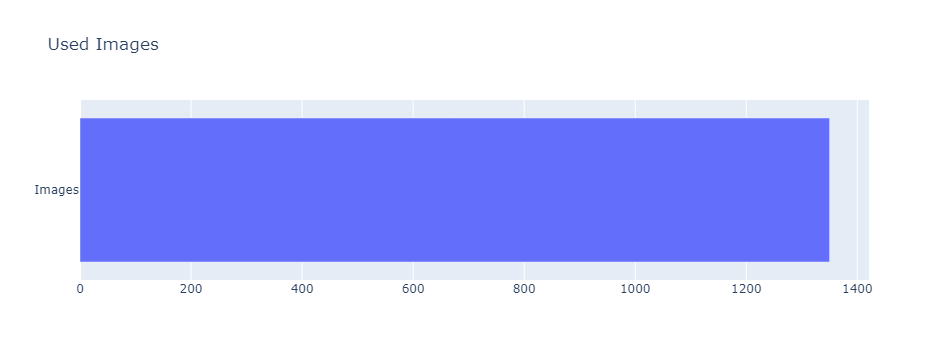

In [40]:
import plotly.graph_objects as go

# Define data
labels = ['Images']
values = [1350]

# Create horizontal bar chart
fig = go.Figure(data=[go.Bar(y=labels, x=values, orientation='h')])

# Update layout
fig.update_layout(title_text='Used Images')

# Show the chart
fig.show()

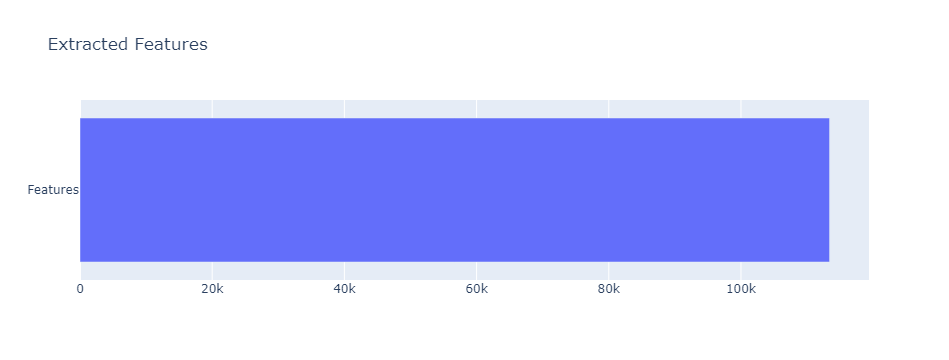

In [41]:
import plotly.graph_objects as go

# Define data
labels = ['Features']
values = [113400]

# Create horizontal bar chart
fig = go.Figure(data=[go.Bar(y=labels, x=values, orientation='h')])

# Update layout
fig.update_layout(title_text='Extracted Features')

# Show the chart
fig.show()

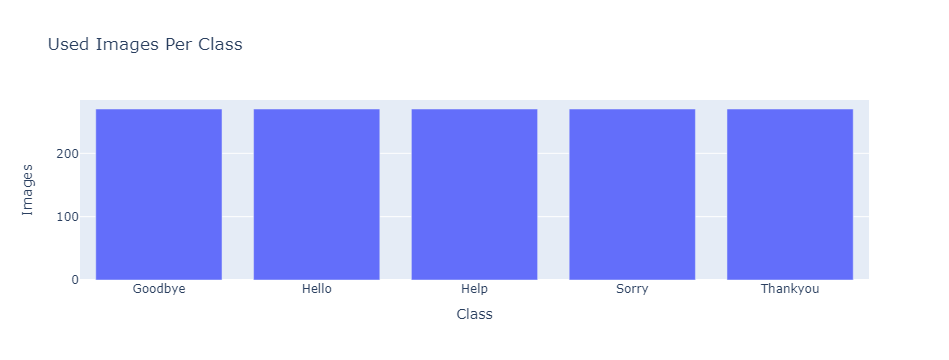

In [37]:
import plotly.express as px

# Create a DataFrame with the data
data = {'Class': ['Goodbye', 'Hello', 'Help', 'Sorry', 'Thankyou'],
        'Images': [270, 270, 270, 270, 270]}

# Create the bar plot using Plotly Express
fig = px.bar(data, x='Class', y='Images', title='Used Images Per Class')

# Show the plot
fig.show()

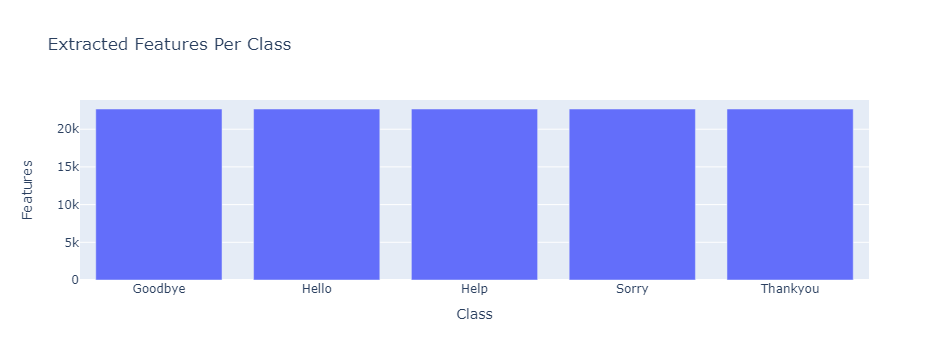

In [39]:
import plotly.express as px

# Create a DataFrame with the data
data = {'Class': ['Goodbye', 'Hello', 'Help', 'Sorry', 'Thankyou'],
        'Features': [22680, 22680, 22680, 22680, 22680]}

# Create the bar plot using Plotly Express
fig = px.bar(data, x='Class', y='Features', title='Extracted Features Per Class')

# Show the plot
fig.show()

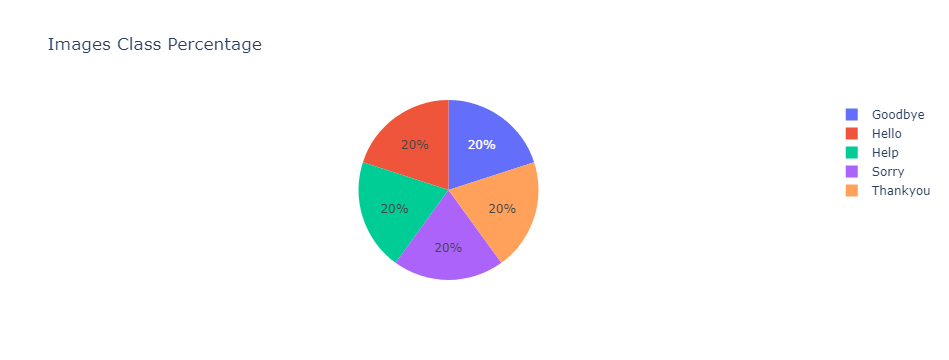

In [42]:
import plotly.graph_objects as go

# Define data
labels = ['Goodbye', 'Hello', 'Help', 'Sorry', 'Thankyou']
values = [20, 20, 20, 20, 20]  # percentages

# Create pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])

# Update layout
fig.update_layout(title_text='Images Class Percentage')

# Show the chart
fig.show()


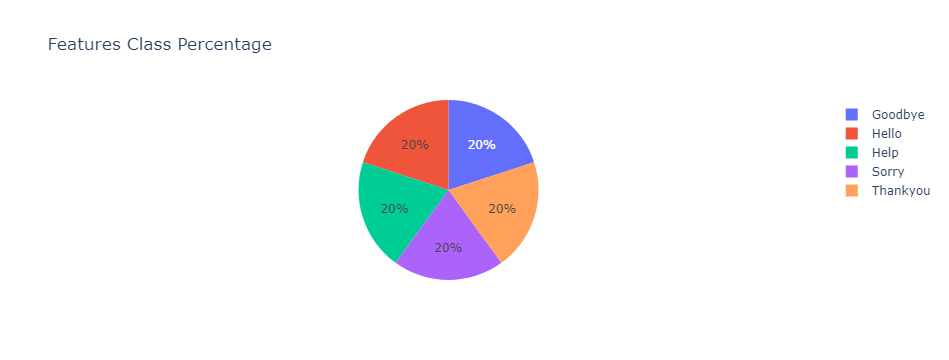

In [43]:
import plotly.graph_objects as go

# Define data
labels = ['Goodbye', 'Hello', 'Help', 'Sorry', 'Thankyou']
values = [20, 20, 20, 20, 20]  # percentages

# Create pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])

# Update layout
fig.update_layout(title_text='Features Class Percentage')

# Show the chart
fig.show()


# Save Features and labels in data.pickle file

In [4]:
# save all_landmarks and labels in file called data.pickle using pickle module 
data_file = open('data.pickle','wb')
pickle.dump({'all_landmarks':all_landmarks, 'labels':labels}, data_file)
data_file.close()

# Load Features and labels from data.pickle file 

In [6]:
# load the values from the file 
data_file = open('data.pickle', 'rb')
data = pickle.load(data_file)

landmarks = data['all_landmarks']
labels = data['labels']

data_file.close()

# Convert Features and labels to numpy arrays

In [7]:
# convert the data to arrays 
landmarks_array = np.array(landmarks)
labels_array = np.array(labels)

print(type(landmarks_array))
print(type(labels_array))

print(landmarks_array.shape)
print(labels_array.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(1350, 84)
(1350,)


# Dataset Spliting

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(landmarks_array, labels_array, test_size=0.2, shuffle=True, stratify=labels)

# Spliting Visualization

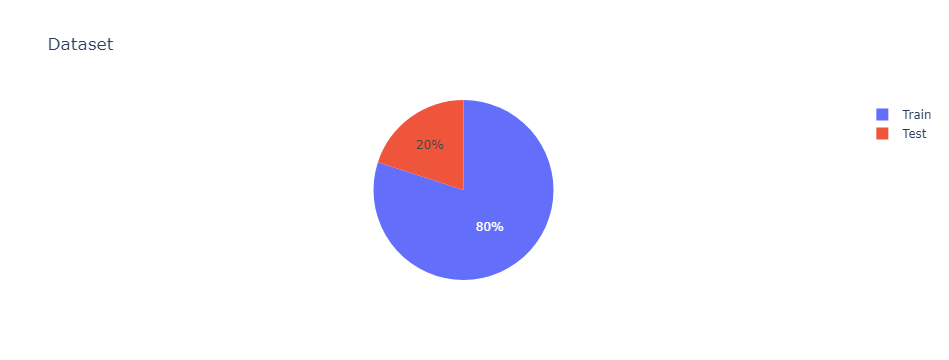

In [28]:
import plotly.graph_objects as go

# Define data
labels = ['Train', 'Test']
values = [80, 20]  # percentages

# Create pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])

# Update layout
fig.update_layout(title_text='Dataset')

# Show the chart
fig.show()

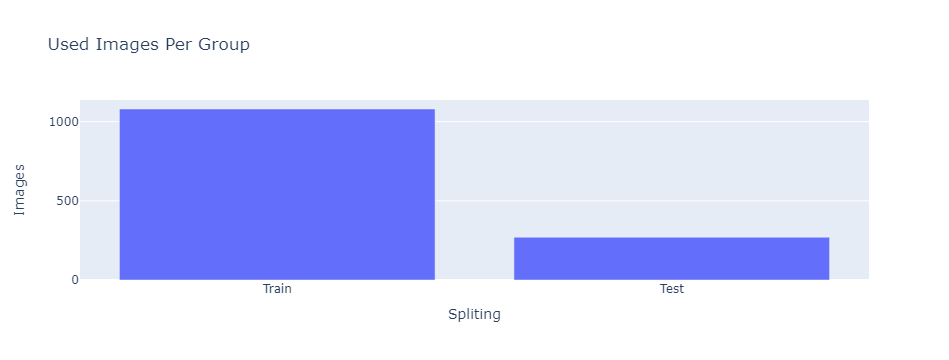

In [47]:
import plotly.express as px

# Create a DataFrame with the data
data = {'Spliting': ['Train', 'Test'],
        'Images': [1080, 270]}

# Create the bar plot using Plotly Express
fig = px.bar(data, x='Spliting', y='Images', title='Used Images Per Group')

# Show the plot
fig.show()

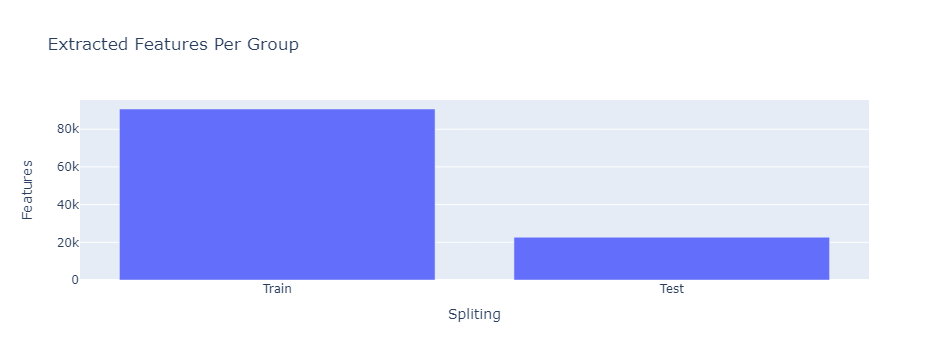

In [48]:
import plotly.express as px

# Create a DataFrame with the data
data = {'Spliting': ['Train', 'Test'],
        'Features': [90720, 22680]}

# Create the bar plot using Plotly Express
fig = px.bar(data, x='Spliting', y='Features', title='Extracted Features Per Group')

# Show the plot
fig.show()

# Train Data Visualization

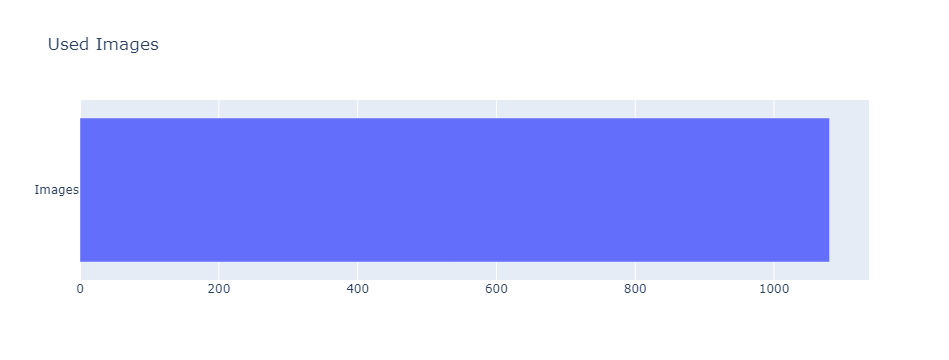

In [49]:
import plotly.graph_objects as go

# Define data
labels = ['Images']
values = [1080]

# Create horizontal bar chart
fig = go.Figure(data=[go.Bar(y=labels, x=values, orientation='h')])

# Update layout
fig.update_layout(title_text='Used Images')

# Show the chart
fig.show()

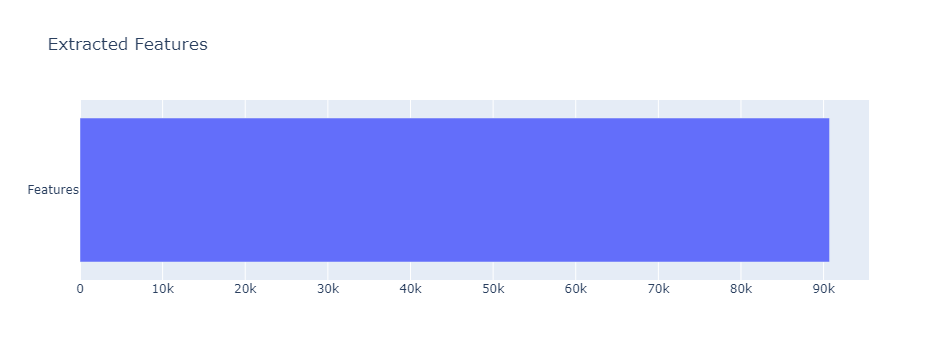

In [50]:
import plotly.graph_objects as go

# Define data
labels = ['Features']
values = [90720]

# Create horizontal bar chart
fig = go.Figure(data=[go.Bar(y=labels, x=values, orientation='h')])

# Update layout
fig.update_layout(title_text='Extracted Features')

# Show the chart
fig.show()

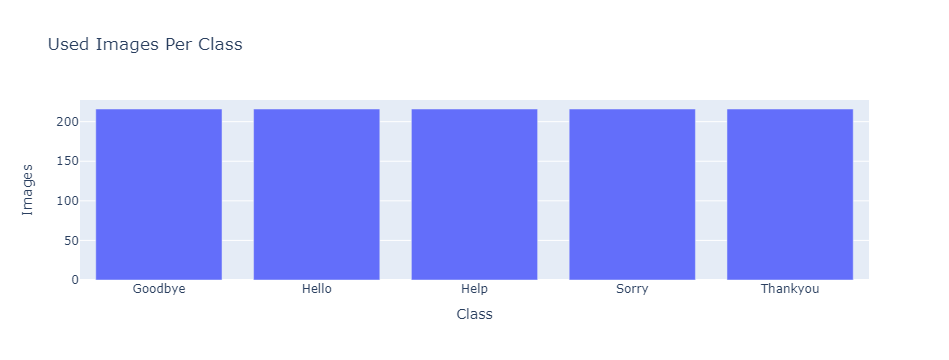

In [51]:
import plotly.express as px

# Create a DataFrame with the data
data = {'Class': ['Goodbye', 'Hello', 'Help', 'Sorry', 'Thankyou'],
        'Images': [216, 216, 216, 216, 216]}

# Create the bar plot using Plotly Express
fig = px.bar(data, x='Class', y='Images', title='Used Images Per Class')

# Show the plot
fig.show()

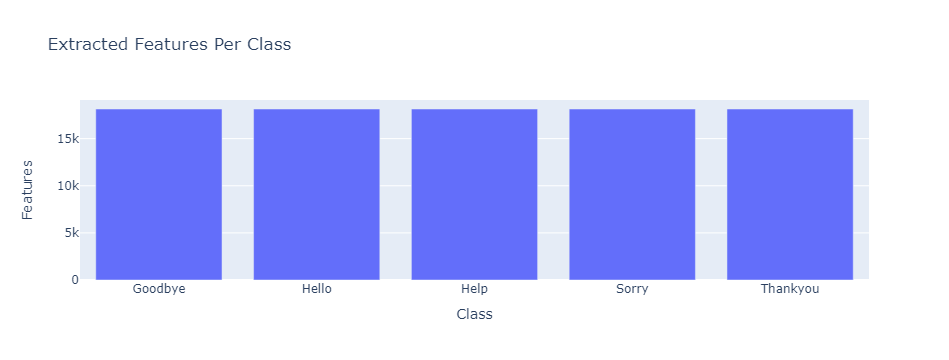

In [52]:
import plotly.express as px

# Create a DataFrame with the data
data = {'Class': ['Goodbye', 'Hello', 'Help', 'Sorry', 'Thankyou'],
        'Features': [18144, 18144, 18144, 18144, 18144]}

# Create the bar plot using Plotly Express
fig = px.bar(data, x='Class', y='Features', title='Extracted Features Per Class')

# Show the plot
fig.show()

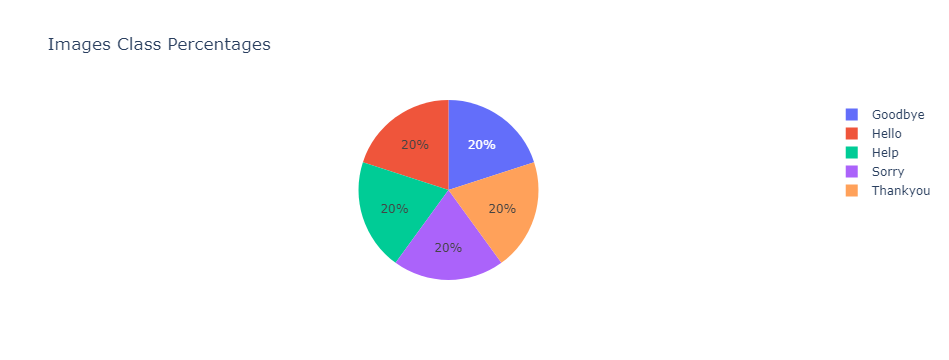

In [25]:
import plotly.graph_objects as go

# Define data
labels = ['Goodbye', 'Hello', 'Help', 'Sorry', 'Thankyou']
values = [20, 20, 20, 20, 20]  # percentages

# Create pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])

# Update layout
fig.update_layout(title_text='Images Class Percentages')

# Show the chart
fig.show()


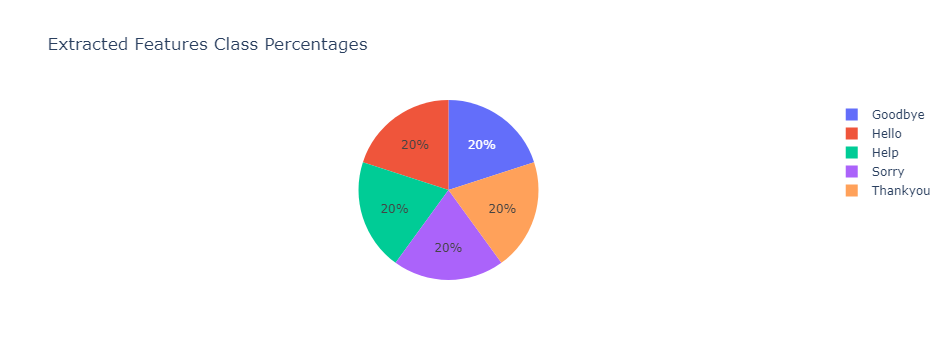

In [26]:
import plotly.graph_objects as go

# Define data
labels = ['Goodbye', 'Hello', 'Help', 'Sorry', 'Thankyou']
values = [20, 20, 20, 20, 20]  # percentages

# Create pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])

# Update layout
fig.update_layout(title_text='Extracted Features Class Percentages')

# Show the chart
fig.show()


# Test Data Visualization

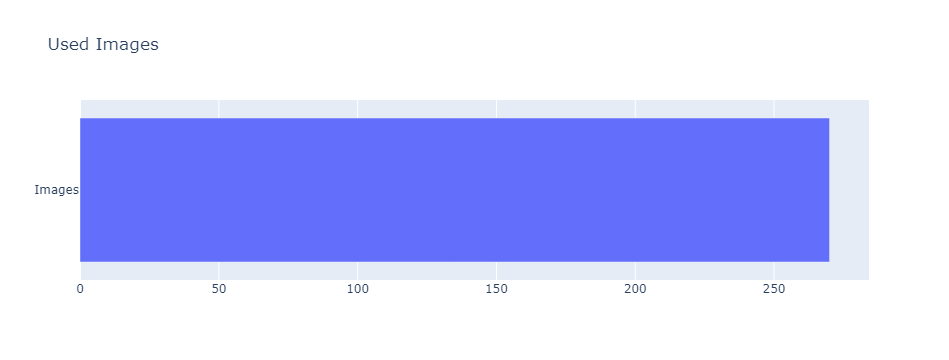

In [27]:
import plotly.graph_objects as go

# Define data
labels = ['Images']
values = [270]

# Create horizontal bar chart
fig = go.Figure(data=[go.Bar(y=labels, x=values, orientation='h')])

# Update layout
fig.update_layout(title_text='Used Images')

# Show the chart
fig.show()

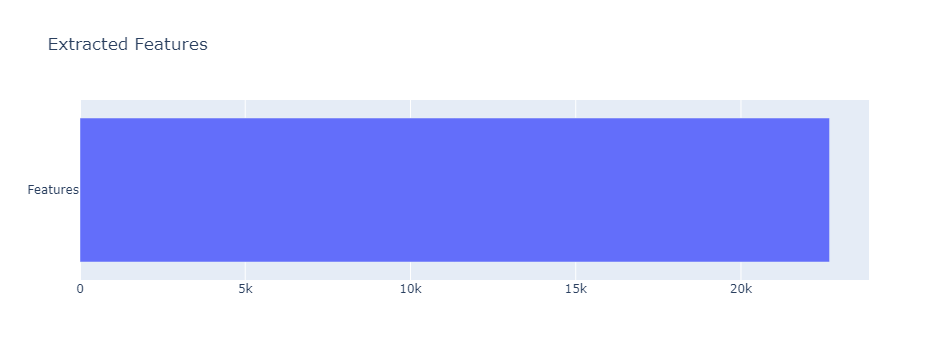

In [28]:
import plotly.graph_objects as go

# Define data
labels = ['Features']
values = [22680]

# Create horizontal bar chart
fig = go.Figure(data=[go.Bar(y=labels, x=values, orientation='h')])

# Update layout
fig.update_layout(title_text='Extracted Features')

# Show the chart
fig.show()

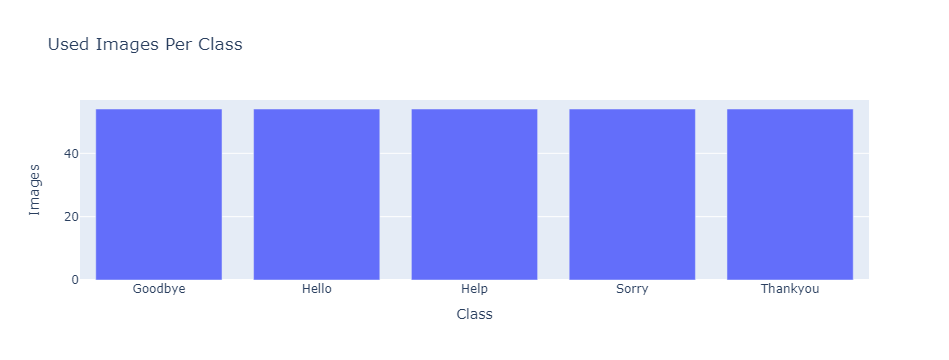

In [30]:
import plotly.express as px

# Create a DataFrame with the data
data = {'Class': ['Goodbye', 'Hello', 'Help', 'Sorry', 'Thankyou'],
        'Images': [54, 54, 54, 54, 54]}

# Create the bar plot using Plotly Express
fig = px.bar(data, x='Class', y='Images', title='Used Images Per Class')

# Show the plot
fig.show()

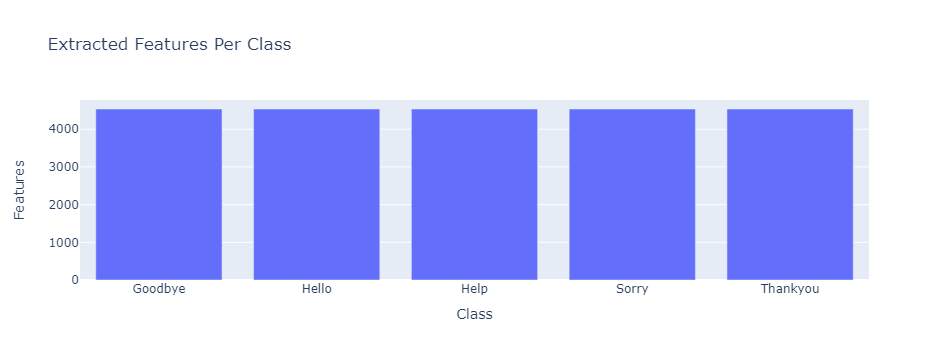

In [31]:
import plotly.express as px

# Create a DataFrame with the data
data = {'Class': ['Goodbye', 'Hello', 'Help', 'Sorry', 'Thankyou'],
        'Features': [4536, 4536, 4536, 4536, 4536]}

# Create the bar plot using Plotly Express
fig = px.bar(data, x='Class', y='Features', title='Extracted Features Per Class')

# Show the plot
fig.show()

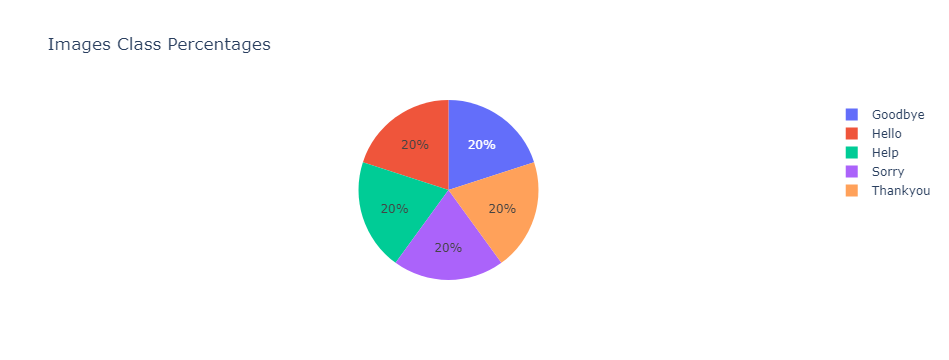

In [32]:
import plotly.graph_objects as go

# Define data
labels = ['Goodbye', 'Hello', 'Help', 'Sorry', 'Thankyou']
values = [20, 20, 20, 20, 20]  # percentages

# Create pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])

# Update layout
fig.update_layout(title_text='Images Class Percentages')

# Show the chart
fig.show()

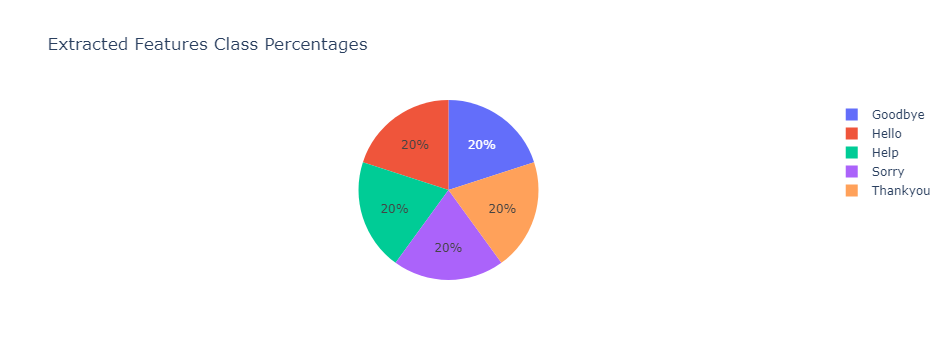

In [33]:
import plotly.graph_objects as go

# Define data
labels = ['Goodbye', 'Hello', 'Help', 'Sorry', 'Thankyou']
values = [20, 20, 20, 20, 20]  # percentages

# Create pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])

# Update layout
fig.update_layout(title_text='Extracted Features Class Percentages')

# Show the chart
fig.show()


# 3. Model Building

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
model_random_forest = RandomForestClassifier()

# 4. Model Training

In [12]:
model_random_forest.fit(x_train, y_train)

RandomForestClassifier()

# Save model

In [13]:
# save the model
model_file = open('model.pickle','wb')
pickle.dump({'model':model_random_forest}, model_file)
model_file.close()

# Load Model

In [14]:
# load model
model_file = open('model.pickle','rb')
model_dict = pickle.load(model_file)
model = model_dict['model']

# 5. Model Evaluation

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, classification_report

In [16]:
# get the y_predict 
y_predict = model.predict(x_test)
print(y_predict)

[3 2 0 1 2 3 2 1 4 2 4 4 1 2 4 0 3 4 4 1 1 4 0 1 2 4 2 1 4 3 0 3 2 0 2 3 3
 1 3 1 0 1 3 1 1 2 1 0 2 0 2 3 3 2 2 1 3 3 0 4 4 3 2 3 2 1 2 3 4 3 4 0 4 4
 1 3 3 2 1 3 1 1 4 1 0 0 0 0 4 0 2 1 3 4 2 0 0 4 2 2 2 2 2 4 1 3 1 2 4 4 0
 0 1 0 0 3 2 1 3 0 1 1 4 1 4 3 0 2 2 3 2 3 3 1 1 4 3 2 3 0 2 1 4 3 4 4 0 0
 0 0 1 1 0 0 2 3 3 3 3 0 1 3 3 4 0 4 1 0 4 4 4 4 4 2 2 2 4 4 3 2 3 1 1 2 0
 2 0 4 4 3 0 4 1 1 3 0 4 3 4 1 3 1 4 3 0 4 1 2 0 3 1 2 1 1 0 1 2 1 0 1 2 2
 3 2 4 3 3 0 4 2 3 0 0 4 0 0 1 4 3 0 4 2 0 2 1 2 1 3 0 4 0 2 0 4 1 1 1 1 3
 2 0 4 4 2 2 0 2 0 2 3]


# Confusion Matrix

In [17]:
cm = confusion_matrix(y_test, y_predict)
print(cm)

[[53  1  0  0  0]
 [ 0 54  0  0  0]
 [ 0  0 54  0  0]
 [ 0  0  1 53  0]
 [ 1  0  0  0 53]]


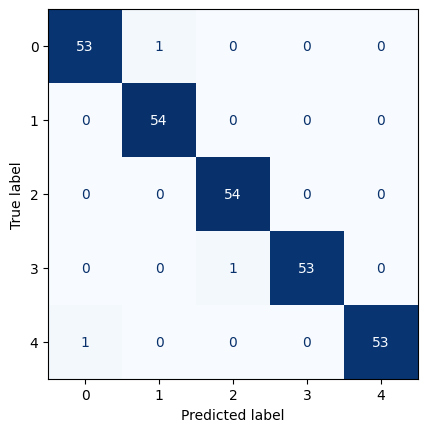

In [18]:
confusion_matrix_figure = ConfusionMatrixDisplay(cm)
confusion_matrix_figure.plot(cmap='Blues', colorbar=False)
plt.show()

# Accuracy

In [19]:
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)

0.9888888888888889


# Precision

In [20]:
precision = precision_score(y_test, y_predict, average='micro')
print(precision)

0.9888888888888889


# F1-score

In [21]:
f1 = f1_score(y_test, y_predict, average='micro')
print(f1)

0.9888888888888889


# Recall

In [22]:
recall = recall_score(y_test, y_predict, average='micro')
print(recall)

0.9888888888888889


# Classification Report

In [23]:
report = classification_report(y_test, y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        54
           1       0.98      1.00      0.99        54
           2       0.98      1.00      0.99        54
           3       1.00      0.98      0.99        54
           4       1.00      0.98      0.99        54

    accuracy                           0.99       270
   macro avg       0.99      0.99      0.99       270
weighted avg       0.99      0.99      0.99       270



# 6. Test model on videos

# Function: convert index to label 

In [24]:
# define fucntion that convert the index of the class to its label
# index -> label
def index_to_label(index):
    if index == 0:
        return 'Goodbye'
    elif index == 1:
        return 'Hello'
    elif index == 2:
        return 'Help'
    elif index == 3:
        return 'Sorry'
    elif index == 4:
        return 'Thankyou'
    else:
        return 'Model only predict 5 classes from [0] to [4]'

# Function: take image and output label and its probability

In [25]:
# define method to predict image with the random forest model
# image -> label, probablity of it 

def model_image_predict(image):
    
    # convert image to rgb 
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # create object just focus on the hands 
    mp_hands = mp.solutions.hands

    # get the model that detect hand_landmarks 
    hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)
    
    # get landmarks
    result = hands.process(image_rgb)
    
    # define list to put all the landmarks in it 
    all_landmarks = []
    
    # define list to put in it x,y values for each landmarks 
    current_image_landmarks = []

    # get x and y value for each landmark

    # check if there is any detection of hands or not 
    if result.multi_hand_landmarks:

        for hand_landmark in result.multi_hand_landmarks:
            for landmark in hand_landmark.landmark:
                current_image_landmarks.append(landmark.x)
                current_image_landmarks.append(landmark.y)

        # check that the number of landmarks are equal for each image
        if len(current_image_landmarks) < 84:
            current_image_landmarks = current_image_landmarks + [0]*(84-len(current_image_landmarks))

        # append the value of current_image_data in the all_data list
        all_landmarks.append(current_image_landmarks)
        
        # convert the all_landmarks from list to 2d array
        all_landmarks_array = np.array(all_landmarks)
        
        # load model
        model_file = open('model.pickle','rb')
        model_dict = pickle.load(model_file)
        model = model_dict['model']
        prediction = model.predict(all_landmarks_array)
        prediction_with_probability = model.predict_proba(all_landmarks_array)
        model_file.close()

        return {'class':prediction[0], 'probability':prediction_with_probability[0][prediction[0]]}


# Test the function on images 

In [26]:
image_path = os.path.join('data', 'goodbye', 'frame_280.jpg')
image = cv2.imread(image_path)

print(model_image_predict(image))
print(type(model_image_predict(image)))

{'class': 0, 'probability': 0.96}
<class 'dict'>


# Function: Convert the video to text
- Both situations: 
    - 1 sign language 
    - Multiple sign language 

In [27]:
def video_to_text(video_path, multiple_sl=False):

    # read the video
    video = cv2.VideoCapture(video_path)

    # calculate the frame per second of the video -> take 1 frame per 1/2 second
    fps = round(round(video.get(cv2.CAP_PROP_FPS))/2) # 30 frmas per sec [in each second we will get 2 frames for detection process]

    # define frame_counter variable --> when it reach 15 we will take this frame [so we take a frame after 1/2 second]
    frame_counter = 0

    # get all predictions from the video in all_prediction dictionary 
    all_predictions = dict()
    prediction_id = 0

    status = True  
    while status:
        # read frames from the video
        status, frame = video.read()
        
        if status == True:
            # count the current frame
            frame_counter += 1
            # here is the frame that will be used for prediction
            if frame_counter % fps == 0:
                prediction = model_image_predict(frame)
                prediction_id += 1 
                all_predictions[prediction_id] = prediction
    
    # in case of 1 sign language
    if multiple_sl == False:
        max_probability = 0 
        best_result = dict()

        for i in all_predictions:
            # check if there is a prediction or not
            if all_predictions[i]:
                if all_predictions[i]['probability'] > max_probability:
                    max_probability = all_predictions[i]['probability']
                    best_result = all_predictions[i]

        label = index_to_label(best_result['class'])

        return label   
    
    # in case of more than 1 sign langauge
    else:
        threshold = 0.90
        all_classes = str()
        for i in all_predictions:
            # check if there is a prediction or not
            if all_predictions[i]:
                if all_predictions[i]['probability'] > threshold:
                    all_classes += index_to_label(all_predictions[i]['class']) + ' '
        
        # make unique classes [Cancel repetition]
        previous_class = None
        final_classes = []
        
        for i in all_classes.rstrip().split():
            
            if i != previous_class:
                final_classes.append(i)
                previous_class = i
        
        return " ".join(final_classes)

# In case of 1 sign language

In [28]:
# test the function on a videos with only 1 sign language 

for video_name in os.listdir('Tutorial'):
    print(f'-------------------------- {video_name} ---------------------------')
    print(video_to_text(os.path.join('Tutorial', video_name), multiple_sl=False))
    print()


-------------------------- goodbye_1.mp4 ---------------------------
Goodbye

-------------------------- goodbye_2.mp4 ---------------------------
Goodbye

-------------------------- hello_1.mp4 ---------------------------
Hello

-------------------------- hello_2.mp4 ---------------------------
Hello

-------------------------- hello_3.mp4 ---------------------------
Hello

-------------------------- help_1.mp4 ---------------------------
Help

-------------------------- help_2.mp4 ---------------------------
Help

-------------------------- help_3.mp4 ---------------------------
Help

-------------------------- help_4.mp4 ---------------------------
Help

-------------------------- help_5.mp4 ---------------------------
Help

-------------------------- sorry_1.mp4 ---------------------------
Sorry

-------------------------- sorry_2.mp4 ---------------------------
Sorry

-------------------------- sorry_3.mp4 ---------------------------
Sorry

-------------------------- sorry_4.mp4 -

# In case of multiple sign language

In [29]:
# test the function on a videos with more than 1 sign language

for video_name in os.listdir('all_in_one'):
    print(f'-------------------------- {video_name} ---------------------------')
    print(video_to_text(os.path.join('all_in_one', video_name), True))
    print()

-------------------------- all_in_one_1.mp4 ---------------------------
Hello Sorry Help Thankyou Goodbye

-------------------------- all_in_one_2.mp4 ---------------------------
Hello Sorry Help Thankyou Goodbye



# Test on new videos

In [30]:
for video_name in os.listdir('new_videos'):
    print(f'------------------------ {video_name} ----------------------')
    print(video_to_text(os.path.join('new_videos', video_name), False))
    print()

------------------------ goodbye.mp4 ----------------------
Help

------------------------ hello.mp4 ----------------------
Goodbye

------------------------ help.mp4 ----------------------
Help

------------------------ sorry.mp4 ----------------------
Sorry

------------------------ thankyou.mp4 ----------------------
Goodbye



# 7. Increase the size of the test data with new tutorial videos

In [31]:
import mediapipe as mp
import os
import cv2
import numpy as np
import pickle

# Get New Frames

In [ ]:
# extract frames from the new videos 
counter = 0
for video_name in os.listdir('new_videos'):
    video_path = os.path.join('new_videos', video_name)
    video = cv2.VideoCapture(video_path)
    while True:
        status, frame = video.read()
        if status != True:
            break
        counter += 1
        destination = os.path.join('new_videos_frames', f'{video_name}_frame{counter}.jpg')
        cv2.imwrite(destination, frame)

# New Test Data Visualization

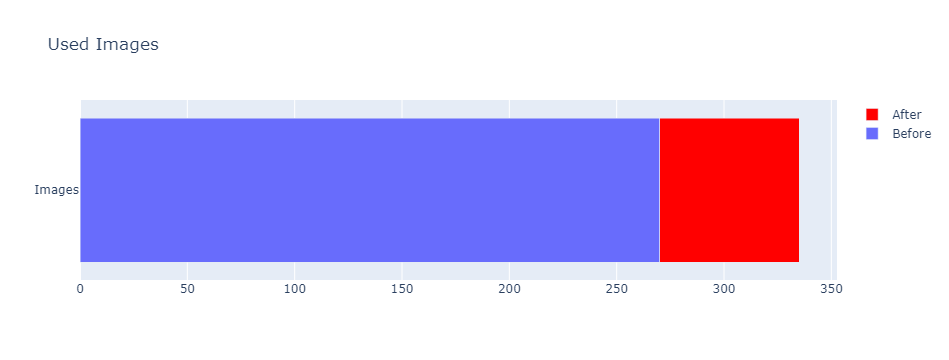

In [51]:
import plotly.graph_objects as go

# Define data
labels = ['Images']
values = [270, 65]

# Define colors
colors = ['rgb(104,108,252)', 'rgb(255, 0, 0)']

# Create horizontal stacked bar chart
fig = go.Figure()

# Add the blue segment
fig.add_trace(go.Bar(y=labels, x=[270], orientation='h', marker_color=colors[0], name='Before'))

# Add the red segment
fig.add_trace(go.Bar(y=labels, x=[65], orientation='h', marker_color=colors[1], name='After'))

# Update layout
fig.update_layout(title_text='Used Images', barmode='stack')

# Show the chart
fig.show()

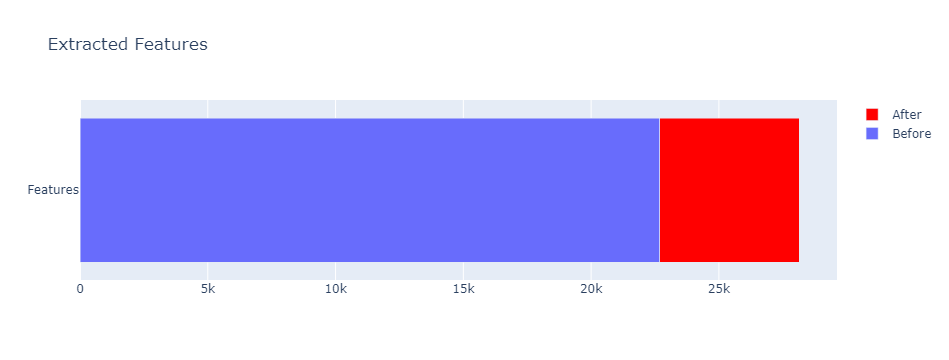

In [53]:
import plotly.graph_objects as go

# Define data
labels = ['Features']
values = [22680, 5460]

# Define colors
colors = ['rgb(104,108,252)', 'rgb(255, 0, 0)']

# Create horizontal stacked bar chart
fig = go.Figure()

# Add the blue segment
fig.add_trace(go.Bar(y=labels, x=[22680], orientation='h', marker_color=colors[0], name='Before'))

# Add the red segment
fig.add_trace(go.Bar(y=labels, x=[5460], orientation='h', marker_color=colors[1], name='After'))

# Update layout
fig.update_layout(title_text='Extracted Features', barmode='stack')

# Show the chart
fig.show()

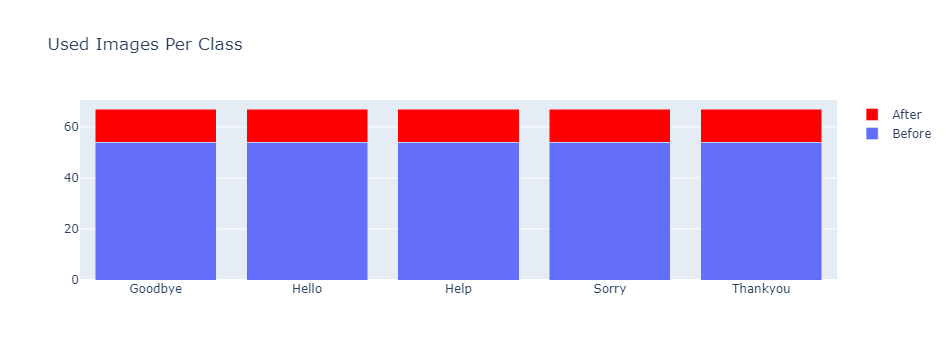

In [75]:
import plotly.graph_objects as go

# Sample data
categories = ['Goodbye', 'Hello', 'Help', 'Sorry', 'Thankyou']
before_values = [54, 54, 54, 54, 54]
after_values = [13, 13, 13, 13, 13]

# Create traces
trace_before = go.Bar(
    x=categories,
    y=before_values,
    name='Before',
)
trace_after = go.Bar(
    x=categories,
    y=after_values,
    name='After',
    marker_color='rgb(255, 0, 0)'
)

# Create layout
layout = go.Layout(
    title='Used Images Per Class',
    barmode='stack',
)

# Create figure
fig = go.Figure(data=[trace_before, trace_after], layout=layout)

# Show plot
fig.show()


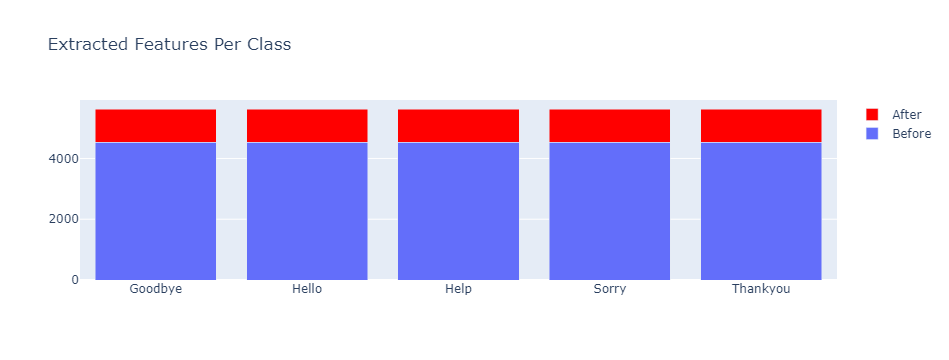

In [76]:
import plotly.graph_objects as go

# Sample data
categories = ['Goodbye', 'Hello', 'Help', 'Sorry', 'Thankyou']
before_values = [4536, 4536, 4536, 4536, 4536]
after_values = [1092, 1092, 1092, 1092, 1092]

# Create traces
trace_before = go.Bar(
    x=categories,
    y=before_values,
    name='Before',
)
trace_after = go.Bar(
    x=categories,
    y=after_values,
    name='After',
    marker_color='rgb(255, 0, 0)'
)

# Create layout
layout = go.Layout(
    title='Extracted Features Per Class',
    barmode='stack',
)

# Create figure
fig = go.Figure(data=[trace_before, trace_after], layout=layout)

# Show plot
fig.show()


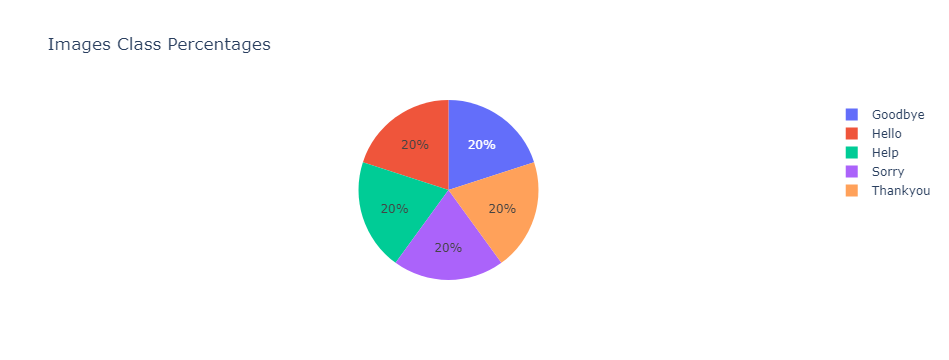

In [59]:
import plotly.graph_objects as go

# Define data
labels = ['Goodbye', 'Hello', 'Help', 'Sorry', 'Thankyou']
values = [20, 20, 20, 20, 20]  # percentages

# Create pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])

# Update layout
fig.update_layout(title_text='Images Class Percentages')

# Show the chart
fig.show()

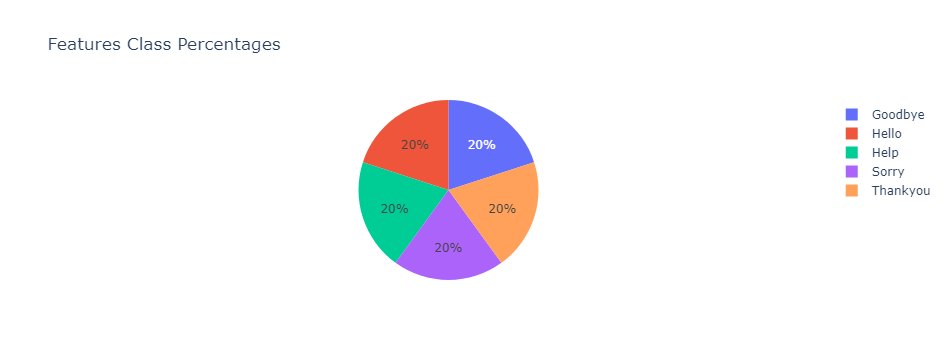

In [60]:
import plotly.graph_objects as go

# Define data
labels = ['Goodbye', 'Hello', 'Help', 'Sorry', 'Thankyou']
values = [20, 20, 20, 20, 20]  # percentages

# Create pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])

# Update layout
fig.update_layout(title_text='Features Class Percentages')

# Show the chart
fig.show()

# 8. Evaluate the model on the new test data

# Get y_true and y_predict of the new extracted frames

In [32]:
# Create y_true for the new frames 
y_true_new_frames = []

for i in range(5):
    y_true_new_frames += [i]*13

print(y_true_new_frames)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


In [37]:
# Create y_predict for the new frames
y_predict_new_frames = []

for frame_name in os.listdir('new_videos_frames'):
    frame_path = os.path.join('new_videos_frames', frame_name)
    frame = cv2.imread(frame_path)
    prediction = model_image_predict(frame)
    y_predict_new_frames.append(prediction['class'])

print(y_predict_new_frames)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 2, 3, 2, 2, 2, 0, 2, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4]


# Make the new y_true and y_predict

In [35]:
new_y_true = list(y_test) + y_true_new_frames
new_y_predict = list(y_predict) + y_predict_new_frames

In [36]:
print(new_y_true)
print(new_y_predict)

[3, 3, 0, 1, 2, 3, 2, 1, 4, 2, 4, 4, 1, 2, 4, 0, 3, 4, 4, 1, 1, 4, 0, 1, 2, 4, 2, 1, 4, 3, 0, 3, 2, 0, 2, 3, 3, 1, 3, 1, 0, 1, 3, 1, 1, 2, 1, 0, 2, 0, 2, 3, 3, 2, 2, 1, 3, 3, 0, 4, 4, 3, 2, 3, 2, 1, 2, 3, 4, 3, 4, 0, 4, 4, 1, 3, 3, 2, 1, 3, 1, 1, 4, 1, 0, 0, 0, 0, 4, 0, 2, 1, 3, 4, 2, 0, 0, 4, 2, 2, 2, 2, 2, 4, 1, 3, 1, 2, 4, 4, 0, 0, 1, 0, 0, 3, 2, 1, 3, 0, 1, 1, 4, 1, 4, 3, 0, 2, 2, 3, 2, 3, 3, 1, 1, 4, 3, 2, 3, 0, 2, 1, 4, 3, 4, 4, 0, 0, 0, 0, 1, 1, 0, 0, 2, 3, 3, 3, 3, 0, 1, 3, 3, 4, 0, 4, 1, 0, 4, 4, 4, 4, 4, 2, 2, 2, 4, 4, 3, 2, 3, 0, 1, 2, 0, 2, 0, 4, 4, 3, 0, 4, 1, 1, 3, 0, 4, 3, 4, 1, 3, 1, 4, 3, 0, 4, 1, 2, 0, 3, 1, 2, 1, 1, 0, 1, 2, 1, 0, 1, 2, 2, 3, 2, 4, 3, 3, 0, 4, 2, 3, 0, 0, 4, 4, 0, 1, 4, 3, 0, 4, 2, 0, 2, 1, 2, 1, 3, 0, 4, 0, 2, 0, 4, 1, 1, 1, 1, 3, 2, 0, 4, 4, 2, 2, 0, 2, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 

# Confusion Matrix

In [38]:
new_cm = confusion_matrix(new_y_true, new_y_predict)
print(new_cm)

[[66  1  0  0  0]
 [ 0 67  0  0  0]
 [ 1  0 59  3  4]
 [ 0  0  1 66  0]
 [12  0  0  0 55]]


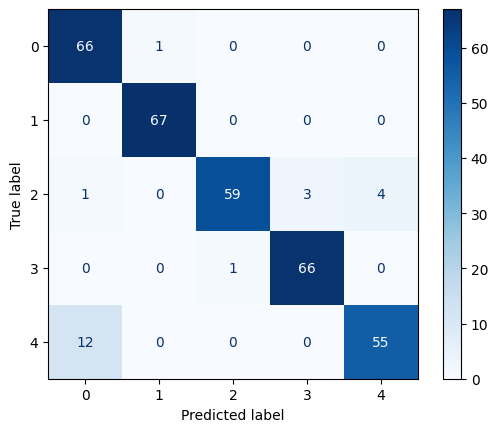

In [58]:
new_confusion_matrix_figure = ConfusionMatrixDisplay(new_cm)
new_confusion_matrix_figure.plot(cmap=plt.cm.Blues)
plt.show()

# Accuracy

In [39]:
new_accuracy = accuracy_score(new_y_true, new_y_predict)
print(new_accuracy)

0.9343283582089552


# Precision 

In [41]:
new_precision = precision_score(new_y_true, new_y_predict, average='micro')
print(new_precision)

0.9343283582089552


# F1-Score

In [43]:
new_f1 = f1_score(new_y_true, new_y_predict, average='micro')
print(new_f1)

0.9343283582089552


# Recall

In [42]:
new_recall = recall_score(new_y_true, new_y_predict, average='micro')
print(new_recall)

0.9343283582089552


# Classification Report

In [44]:
new_report = classification_report(new_y_true, new_y_predict)
print(new_report)

              precision    recall  f1-score   support

           0       0.84      0.99      0.90        67
           1       0.99      1.00      0.99        67
           2       0.98      0.88      0.93        67
           3       0.96      0.99      0.97        67
           4       0.93      0.82      0.87        67

    accuracy                           0.93       335
   macro avg       0.94      0.93      0.93       335
weighted avg       0.94      0.93      0.93       335



# Compare the accuracy of the model on the old test data and new test data

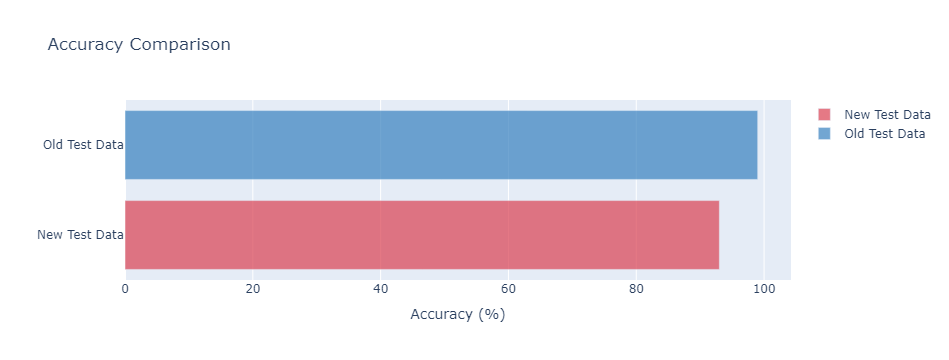

In [47]:
import plotly.graph_objects as go

# Define data
labels = ['Old Test Data', 'New Test Data']
values = [99, 93]

# Create horizontal bar chart
fig = go.Figure()

# Add the second horizontal bar
fig.add_trace(go.Bar(
    y=['New Test Data'],
    x=[values[1]],
    name='New Test Data',
    orientation='h',
    marker=dict(color='rgba(219, 64, 82, 0.7)')
))

# Add the first horizontal bar
fig.add_trace(go.Bar(
    y=['Old Test Data'],
    x=[values[0]],
    name='Old Test Data',
    orientation='h',
    marker=dict(color='rgba(55, 128, 191, 0.7)')
))

# Update layout
fig.update_layout(
    title='Accuracy Comparison',
    xaxis_title='Accuracy (%)',
    yaxis_title='',
    barmode='group',
    bargap=0.15,  # gap between bars of adjacent location coordinates
    bargroupgap=0.1  # gap between bars of the same location coordinates
)

# Show the chart
fig.show()


# 9. Test using webcam [Optional]

In [2]:
import mediapipe as mp
import cv2
import numpy as np
import pickle
# load model 
model_file = open('model.pickle','rb')
model_dict = pickle.load(model_file)
model = model_dict['model']

In [3]:
# create objects just focus on the hands 
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

# get the model that detect hand_landmarks 
hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)

# setup webcam 
camera = cv2.VideoCapture(0)

# loop to read frames from the webcam
while camera.isOpened():

    # read frames from the webcam
    status, frame = camera.read()
    
    # flip the frame 
    frame = cv2.flip(frame, 1)

    # convert frame to rgb
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # get hands detection on the rgb image 
    result = hands.process(frame_rgb)
    
    # define lists
    current_image_landmarks = []
    all_landmarks = []
    
    if result.multi_hand_landmarks:
        for hand_landmark in result.multi_hand_landmarks:
            # draw the landmarks
            mp_drawing.draw_landmarks(
                frame,
                hand_landmark, 
                mp_hands.HAND_CONNECTIONS,
                mp_drawing_styles.get_default_hand_landmarks_style(),
                mp_drawing_styles.get_default_hand_connections_style())
                
            for landmark in hand_landmark.landmark:q
                current_image_landmarks.append(landmark.x)
                current_image_landmarks.append(landmark.y)

        # check that the number of landmarks are equal for each image
        if len(current_image_landmarks) < 84:
            current_image_landmarks = current_image_landmarks + [0]*(84-len(current_image_landmarks))

        # append the value of current_image_data in the all_data list
        all_landmarks.append(current_image_landmarks)
        
        # convert the all_landmarks from list to 2d array
        all_landmarks_array = np.array(all_landmarks)
        
        prediction = model.predict(all_landmarks_array)
        prediction_with_probability = model.predict_proba(all_landmarks_array)
        
        class_label = index_to_label(prediction[0])
        full_text = f'{class_label}, {str(prediction_with_probability[0][prediction[0]] * 100)[:4]} %'
        
        cv2.putText(frame, full_text, (100,100), cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0,0,255), 3, cv2.LINE_AA)
        # cv2.rectangle(frame,(0, 100), (100,0), (0,0,255), 3, cv2.LINE_AA)

    
    cv2.imshow('Window', frame)
    if cv2.waitKey(1) &  0xFF == ord('q'):
        break

camera.release()
cv2.destroyAllWindows()